<a href="https://colab.research.google.com/github/VeldiHruthika/Task-6-K-Nearest-Neighbors-Classification/blob/main/Task_6_K_Nearest_Neighbors_(KNN)_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Required Libraries**

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

# **Load and Explore the Iris Dataset**

In [3]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Display dataset shape and target class names
print("Dataset Shape:", X.shape)
print("Target Classes:", iris.target_names)

Dataset Shape: (150, 4)
Target Classes: ['setosa' 'versicolor' 'virginica']


# **Normalize the Features**

In [4]:
# Standardize features to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Train-Test Split**

In [5]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **Train and Evaluate KNN with Different K Values**

In [6]:
# Train KNN classifiers with different values of K and check test accuracy
k_values = [1, 3, 5, 7]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\nK={k} → Test Accuracy: {acc:.3f}")


K=1 → Test Accuracy: 0.967

K=3 → Test Accuracy: 1.000

K=5 → Test Accuracy: 1.000

K=7 → Test Accuracy: 1.000


# **Final Model Evaluation (K=3)**

In [7]:
# Train final KNN model with K=3
final_k = 3
knn_final = KNeighborsClassifier(n_neighbors=final_k)
knn_final.fit(X_train, y_train)

# Make predictions on test data
final_preds = knn_final.predict(X_test)

# Print classification report
print("\nClassification Report for K=3:\n")
print(classification_report(y_test, final_preds))

# Print confusion matrix
print("\nConfusion Matrix for K=3:\n")
print(confusion_matrix(y_test, final_preds))


Classification Report for K=3:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix for K=3:

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# **Visualize Decision Boundaries (Using First 2 Features)**

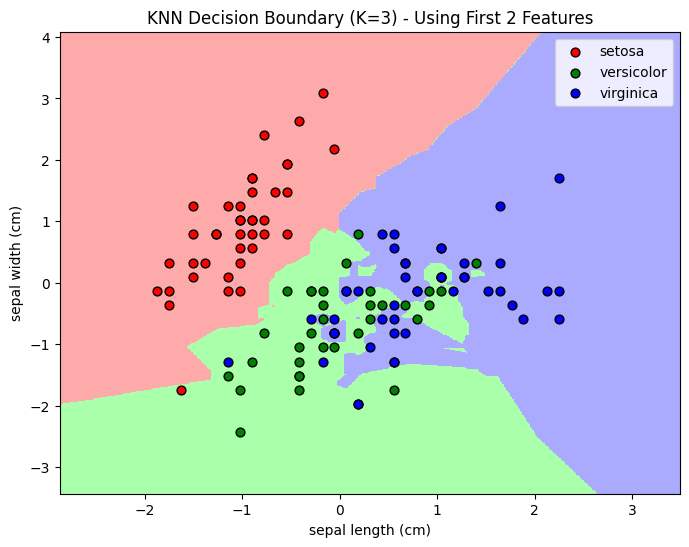

In [8]:
# Use only first two features for 2D visualization
X_2d = X_scaled[:, :2]
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y, test_size=0.2, random_state=42)

# Train KNN on 2D data
knn_2d = KNeighborsClassifier(n_neighbors=final_k)
knn_2d.fit(X_train_2d, y_train_2d)

# Create meshgrid for decision region plotting
h = .02
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class for each grid point
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot training points
for idx, color in enumerate(cmap_bold):
    plt.scatter(X_train_2d[y_train_2d == idx, 0],
                X_train_2d[y_train_2d == idx, 1],
                c=color, label=iris.target_names[idx],
                edgecolor='k', s=40)

plt.title(f"KNN Decision Boundary (K={final_k}) - Using First 2 Features")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()